In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
#import datetime
#import math
import warnings
warnings.filterwarnings('ignore')#, category=DeprecationWarning) 
%matplotlib inline

In [51]:
#cols = ['itr', 'train-rmse-mean', 'train-rmse-std', 'test-rmse-mean', 'test-rmse-std']

In [193]:
dfxg = pd.read_csv('rmse-value-XGBoost.txt',sep='\s+')#, index_col=cols )#, header=None)

In [194]:
#df.to_csv('rmse-value-XGBoost.csv', index=False)

In [195]:
#df=pd.read_csv('rmse-value-XGBoost.csv')

In [196]:
dfxg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
itr                50 non-null int64
train-rmse-mean    50 non-null float64
train-rmse-std     50 non-null float64
test-rmse-mean     50 non-null float64
test-rmse-std      50 non-null float64
dtypes: float64(4), int64(1)
memory usage: 2.0 KB


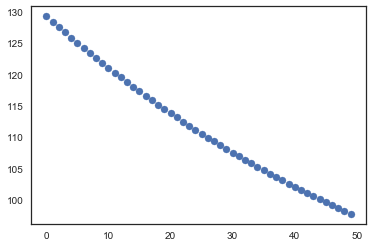

In [197]:
plt.scatter(dfxg['itr'],dfxg['train-rmse-mean'])

# EDA -- Final data `nyc_for_ann.csv`

In [198]:
df = pd.read_csv('nyc_for_ann.csv')

In [199]:
df.head()

,VendorID,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,dispatch,PickUp_hr,DOLocationID,zone
0,2,1,2,1.36,6.5,0.0,0.5,0.00,0.0,0.3,7.30,2,1.0,1,11,41,75
1,1,1,1,0.70,4.0,0.5,0.5,1.30,0.0,0.3,6.60,1,1.0,1,4,95,95
2,2,1,2,4.65,20.5,1.0,0.5,4.46,0.0,0.3,26.76,1,1.0,1,19,225,65
3,2,1,5,2.17,9.0,0.0,0.5,0.00,0.0,0.3,9.80,2,1.0,1,6,95,82
4,2,1,1,0.89,6.0,0.0,0.5,0.00,0.0,0.3,6.80,2,1.0,1,15,116,42


In [200]:
rides_by_hour = df.groupby('PickUp_hr').count()

In [201]:
rides_by_hour.head()

,VendorID,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,dispatch,DOLocationID,zone
PickUp_hr,,,,,,,,,,,,,,,,
0,68283,68283,68283,68283,68283,68283,68283,68283,68283,68283,68283,68283,68283,68283,68283,68283
1,52124,52124,52124,52124,52124,52124,52124,52124,52124,52124,52124,52124,52124,52124,52124,52124
2,36940,36940,36940,36940,36940,36940,36940,36940,36940,36940,36940,36940,36940,36940,36940,36940
3,28293,28293,28293,28293,28293,28293,28293,28293,28293,28293,28293,28293,28293,28293,28293,28293
4,23181,23181,23181,23181,23181,23181,23181,23181,23181,23181,23181,23181,23181,23181,23181,23181


**Creating costume palette**<br>
we can select any column from this grouped data. they all have same value of count

In [202]:
#cust_list=list(rides_by_hour['VendorID'])
cust_list=list(rides_by_hour['VendorID'])
count = 0
custom_palette = {}
for q in cust_list:
#for q in set(set(df['PickUp_hr'])):
#    print(q)
    if q >= 80000:        
        custom_palette[count]= 'r' 
        count=count+1
    elif (q >= 50000 and q <= 80000):        
        custom_palette[count]= 'g' 
        count=count+1
    else:   
#        print('b')
        custom_palette[count]= 'grey' 
        count=count+1

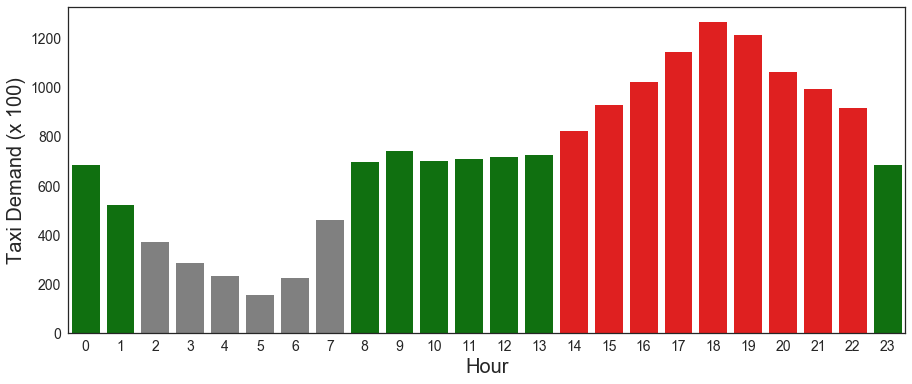

In [210]:
#we can select any column from this grouped data. they all have same value of count
#fig , ax , = plt.subplots(ncols = 1, figsize = (12,4))
fig, ax = plt.subplots(figsize = (15,6))
sns.barplot(rides_by_hour.index, rides_by_hour.VendorID/100, ax = ax, palette = custom_palette)
ax.set_xlabel('Hour', size = 20)
ax.set_ylabel('Taxi Demand (x 100)', size = 20)
ax.tick_params(labelsize=14)
fig.savefig("T_Demand_24_hr.png", dpi = 200)
#ax.set_ylim(0,150);

In [155]:
#cust_list=list(rides_by_hour['VendorID'])
cust_list=list(rides_by_hour['VendorID'])
count = 0
custom_palette = {}
for q in cust_list:
#for q in set(set(df['PickUp_hr'])):
    print(q)
    if q > 60000:
        
        custom_palette[count]= 'r' 
        count=count+1
    else:
        
        custom_palette[count]= 'grey' 
        count=count+1

68283
52124
36940
28293
23181
15527
22307
45922
69405
73937
70012
70687
71588
72244
82082
92961
102273
114483
126553
121468
106453
99280
91766
68285


In [211]:
cust_list

[68283,
 52124,
 36940,
 28293,
 23181,
 15527,
 22307,
 45922,
 69405,
 73937,
 70012,
 70687,
 71588,
 72244,
 82082,
 92961,
 102273,
 114483,
 126553,
 121468,
 106453,
 99280,
 91766,
 68285]

In [163]:
custom_palette

{0: 'g',
 1: 'g',
 2: 'g',
 3: 'g',
 4: 'g',
 5: 'g',
 6: 'g',
 7: 'g',
 8: 'g',
 9: 'g',
 10: 'g',
 11: 'g',
 12: 'g',
 13: 'g',
 14: 'r',
 15: 'r',
 16: 'r',
 17: 'r',
 18: 'r',
 19: 'r',
 20: 'r',
 21: 'r',
 22: 'r',
 23: 'g'}

In [ ]:
cust_list=list(rides_by_hour['VendorID'])
custom_palette = {}
for q in cust_list:
    if q > 60000.0:
        custom_palette[q]= 'r'
    else:
        custom_palette[q]= 'grey'  